<a href="https://colab.research.google.com/github/Swamy612/Supervised-Learning/blob/main/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Source - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing
# Dataset - https://drive.google.com/file/d/1HqTcjEjTTb9-4o6RezlY3BHwHFeQdbn9/view?usp=sharing

In [ ]:
# Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score

# linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# data sample
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# data volume
data.shape

(545, 13)

In [ ]:
# null value check & data type
pd.DataFrame({'data_type': data.dtypes,
              'missing_values': data.isnull().sum()})

,data_type,missing_values
price,int64,0
area,int64,0
bedrooms,int64,0
bathrooms,int64,0
stories,int64,0
mainroad,object,0
guestroom,object,0
basement,object,0
hotwaterheating,object,0
airconditioning,object,0


In [ ]:

# data duplicate
data[data.duplicated()].shape[0]

0

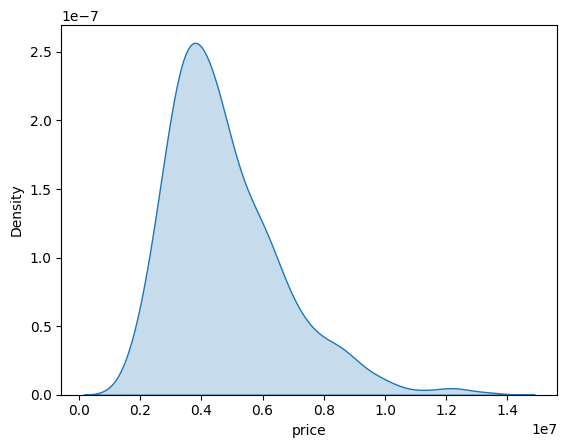

In [ ]:
# analyse the target column
sns.kdeplot(data['price'], fill=True)
plt.show()

# we can apply box-cox transformation to covert the right skewed data to normal distributed data

In [ ]:
# understanding the categorical columns
for cols in data.columns:
    if data[cols].dtype == 'O':
        print(cols, data[cols].unique())

mainroad ['yes' 'no']
guestroom ['no' 'yes']
basement ['no' 'yes']
hotwaterheating ['no' 'yes']
airconditioning ['yes' 'no']
prefarea ['yes' 'no']
furnishingstatus ['furnished' 'semi-furnished' 'unfurnished']


In [ ]:

# train-test split >> encoding >> scaling >> fit

In [ ]:
# dependency split
x = data.iloc[:, 1:]
y = data[['price']]

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# cat cols
cat_cols=[cols for cols in data.columns if data[cols].dtype=='O']

# Encoding
encoder=OneHotEncoder(drop='first',sparse_output=False,dtype='i')

# training data
x_train_cat_encoded=encoder.fit_transform(x_train[cat_cols])
x_train_cat_encoded_df=pd.DataFrame(x_train_cat_encoded,index=x_train.index,columns=encoder.get_feature_names_out())
# Concatenate numerical and encoded categorical features for x_train
x_train_encoded_df=pd.concat([x_train.drop(columns=cat_cols), x_train_cat_encoded_df], axis=1)

# testing data
x_test_cat_encoded=encoder.transform(x_test[cat_cols])
x_test_cat_encoded_df=pd.DataFrame(x_test_cat_encoded,index=x_test.index,columns=encoder.get_feature_names_out())
# Concatenate numerical and encoded categorical features for x_test
x_test_encoded_df=pd.concat([x_test.drop(columns=cat_cols), x_test_cat_encoded_df], axis=1)

In [ ]:
# data scaling for independent
scaler = MinMaxScaler()

# train scaling
x_train_scaled = scaler.fit_transform(x_train_encoded_df)
x_train_scaled = pd.DataFrame(x_train_scaled, index=x_train_encoded_df.index, columns=scaler.get_feature_names_out())

# test scaling
x_test_scaled = scaler.transform(x_test_encoded_df)
x_test_scaled = pd.DataFrame(x_test_scaled, index=x_test_encoded_df.index, columns=scaler.get_feature_names_out())

# data scaling of the target
scale_t = MinMaxScaler()
y_train_scaled = scale_t.fit_transform(y_train)
y_test_scaled = scale_t.transform(y_test)

# Model Building

In [ ]:
# train data sample
x_train_scaled.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,0.365217,0.666667,0.5,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,0.417391,0.333333,0.5,0.666667,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,0.203478,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,0.286957,0.333333,0.0,0.333333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,0.196522,0.333333,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Simple linear regression

    # y = mx + c
    # price = m * (area) + c

# Multiple linear regression
    # y = MnXn + c
    # price = m1*(area) + m2*(bedrooms) + ... + c

In [ ]:
# simple linear model for area to predict price

# add constant
lr_data = sm.add_constant(x_train_scaled['area'])

# fit the data onto the ols model
lr_model = sm.OLS(y_train_scaled, lr_data).fit()

# model params
print(round(lr_model.params, 4))

# price = 0.5899*(area) + 0.1395 (y = mx + c)

const    0.1395
area     0.5899
dtype: float64


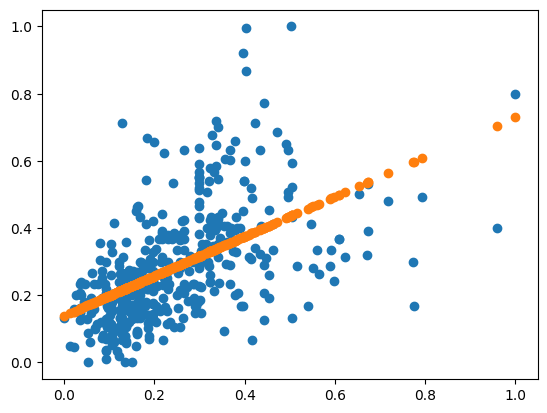

In [ ]:
# scatter plot
plt.scatter(x_train_scaled['area'], y_train_scaled)                              # raw data
plt.scatter(x_train_scaled['area'], 0.5899*(x_train_scaled['area']) + 0.1395)    # best fit line
plt.show()

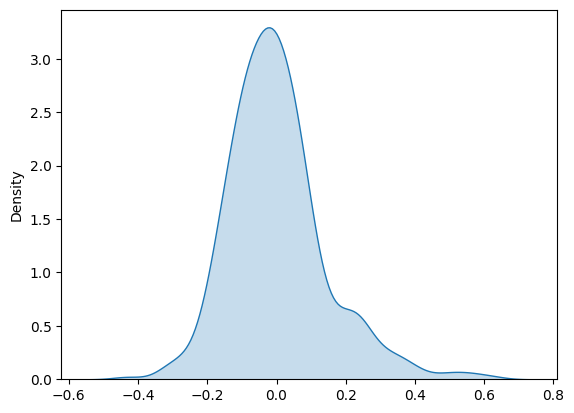

In [ ]:
# residual analysis
y_train_pred=lr_model.predict(lr_data)
res = pd.Series(y_train_scaled.ravel(), index=x_train_scaled.index) - y_train_pred

sns.kdeplot(res, fill=True)
plt.show()

In [ ]:
# R-Square

RSS = ((pd.Series(y_train_scaled.ravel(), index=x_train_scaled.index) - y_train_pred)**2).sum()
TSS = ((y_train_scaled - y_train_scaled.mean())**2).sum()
r_square = (1-(RSS/TSS))*100
print('R-Square:',round(r_square, 2),'%')

R-Square: 28.5 %


In [ ]:
# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           1.75e-33
Time:                        11:15:04   Log-Likelihood:                 234.19
No. Observations:                 436   AIC:                            -464.4
Df Residuals:                     434   BIC:                            -456.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1395      0.013     10.933      0.0

In [ ]:
# Multiple linear regression

# add constant
lr_data = sm.add_constant(x_train_scaled[['area', 'bedrooms']])

# fit the data onto the ols model
lr_model = sm.OLS(y_train_scaled, lr_data).fit()

# model params
print(lr_model.params)

# price = 0.539356*(area) + 0.331276*(bedrroms) + 0.021904

const       0.021904
area        0.539356
bedrooms    0.331276
dtype: float64


In [ ]:
# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           3.10e-44
Time:                        11:18:44   Log-Likelihood:                 261.94
No. Observations:                 436   AIC:                            -517.9
Df Residuals:                     433   BIC:                            -505.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0219      0.019      1.125      0.2

In [ ]:
# ALL AT ONCE

mlr_data = sm.add_constant(x_train_scaled)
mlr_model = sm.OLS(y_train_scaled,mlr_data).fit()
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           2.16e-97
Time:                        11:20:21   Log-Likelihood:                 413.55
No. Observations:                 436   AIC:                            -799.1
Df Residuals:                     422   BIC:                            -742.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# the model is statistically significant but few cols are not
    # reason is that it may have multicollinearity (high correlation between independent features)
    # using VIF (variance inflation factor) we can fix the insignificance
    # VIF Method - VIF > 5 is bad (highly correlated)

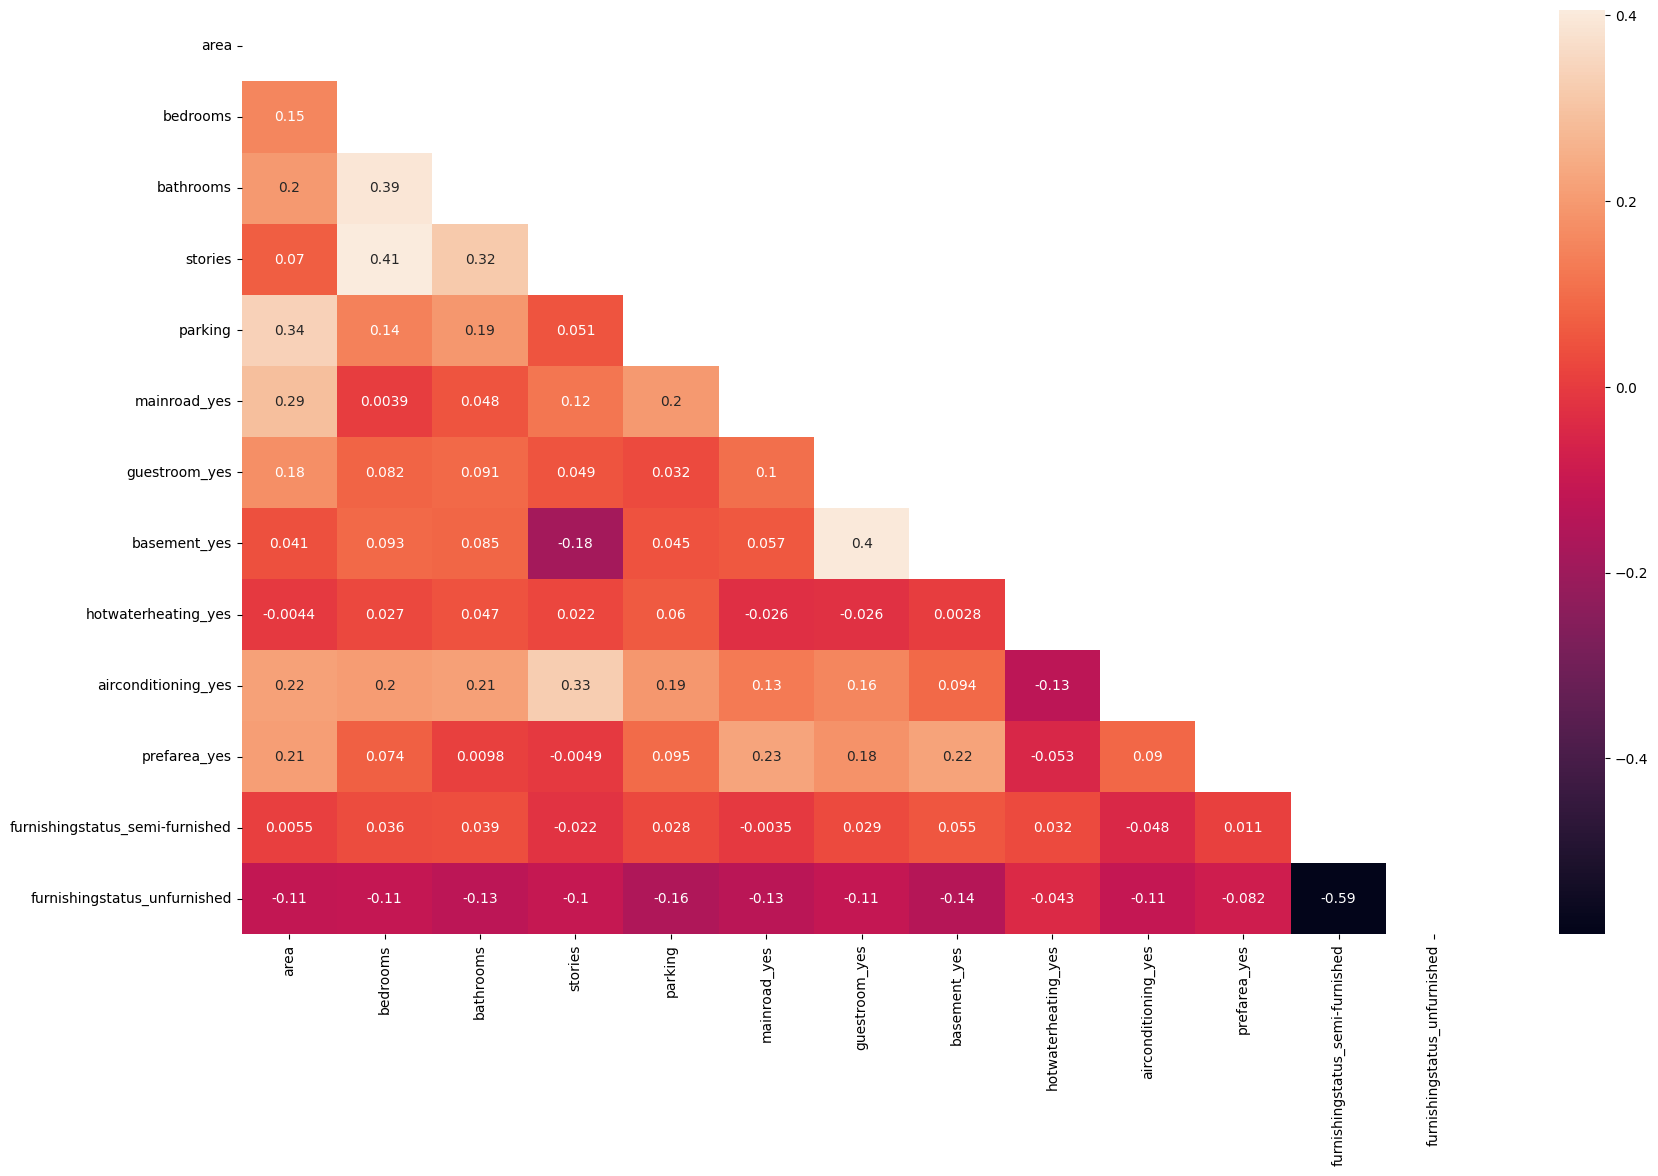

In [ ]:
# heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(x_train_scaled.corr(),
            annot=True,
            mask=np.triu(x_train_scaled.corr()))
plt.show()

In [ ]:
# droping the 'semi-furnished' as the value of p>0.05
x_tr = x_train_scaled.drop(['furnishingstatus_semi-furnished'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_2 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_2 = sm.OLS(y_train_scaled, mlr_data_2).fit()

# model summary
print(mlr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     76.70
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           4.11e-98
Time:                        11:28:43   Log-Likelihood:                 412.99
No. Observations:                 436   AIC:                            -800.0
Df Residuals:                     423   BIC:                            -747.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# droping the 'guestroom' as the value of p>0.05
x_tr = x_tr.drop(['guestroom_yes'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_3 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_3 = sm.OLS(y_train_scaled, mlr_data_3).fit()

# model summary
print(mlr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     83.09
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           1.68e-98
Time:                        11:29:17   Log-Likelihood:                 411.60
No. Observations:                 436   AIC:                            -799.2
Df Residuals:                     424   BIC:                            -750.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# dataframe with column name and respective vif

vif_df = pd.DataFrame()
vif_df['Feature'] = x_tr.columns
vif_df['VIF'] = [round(vif(x_tr.values, i), 2) for i in range(x_tr.shape[1])]
vif_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_df

,Feature,VIF
1,bedrooms,6.80
5,mainroad_yes,5.64
0,area,4.41
3,stories,2.74
4,parking,1.98
8,airconditioning_yes,1.81
6,basement_yes,1.81
2,bathrooms,1.66
9,prefarea_yes,1.48
10,furnishingstatus_unfurnished,1.41


In [ ]:
# droping the bedroom based on vif
x_tr = x_tr.drop(['bedrooms'], axis=1)

In [ ]:
# refitting the data
# add constant
mlr_data_4 = sm.add_constant(x_tr)

# fit the data onto the ols model
mlr_model_4 = sm.OLS(y_train_scaled, mlr_data_4).fit()

# model summary
print(mlr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     91.34
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           2.66e-99
Time:                        11:34:45   Log-Likelihood:                 411.14
No. Observations:                 436   AIC:                            -800.3
Df Residuals:                     425   BIC:                            -755.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
# dataframe with column name and respective vif

vif_df = pd.DataFrame()
vif_df['Feature'] = x_tr.columns
vif_df['VIF'] = [round(vif(x_tr.values, i), 2) for i in range(x_tr.shape[1])]
vif_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_df

,Feature,VIF
4,mainroad_yes,4.91
0,area,4.17
2,stories,2.29
3,parking,1.97
7,airconditioning_yes,1.81
5,basement_yes,1.67
1,bathrooms,1.59
8,prefarea_yes,1.48
9,furnishingstatus_unfurnished,1.32
6,hotwaterheating_yes,1.08


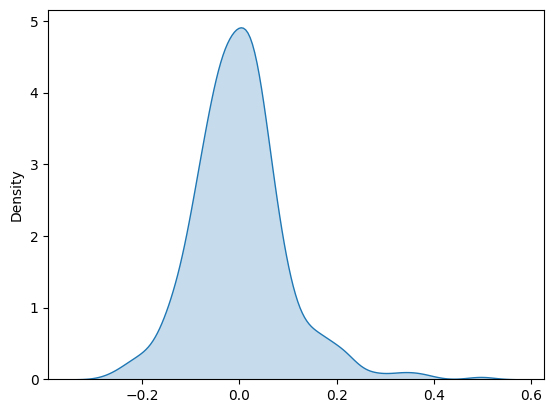

In [ ]:
# residual analysis
y_train_pred = mlr_model_4.predict(mlr_data_4)
res = pd.Series(y_train_scaled.ravel(), index=x_train_scaled.index) - y_train_pred

# kde plot
sns.kdeplot(res, fill=True)
plt.show()

In [ ]:
# test prediction

# add constant
x_test_m4_data = sm.add_constant(x_test_scaled)

# drop the data that are removed in training
x_test_m4_data.drop(['furnishingstatus_semi-furnished', 'guestroom_yes', 'bedrooms'], axis=1, inplace=True)

# prediction on the data
y_pred_m4 = mlr_model_4.predict(x_test_m4_data)

In [ ]:
# model metrics
print('Testing Accuracy:', round(r2_score(y_test_scaled, y_pred_m4)*100,2), '%')

Testing Accuracy: 64.8 %


# RIDGE , LASSO , ELASTIC NET [Regularization]

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# avoid harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import data
data = fetch_california_housing()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# data sample
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# data scaling
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [ ]:

# Linear Models

# 1. Simple linear model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)
lreg_train_score = lin_reg.score(x_train_scaled, y_train)
y_pred_reg = lin_reg.predict(x_test_scaled)
lreg_test_score = r2_score(y_test, y_pred_reg)

# 2. Ridge regression
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train_scaled, y_train)
ridge_train_score = ridge_reg.score(x_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(x_test_scaled)
ridge_test_score = r2_score(y_test, y_pred_ridge)

# 3. Lasso regression
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(x_train_scaled, y_train)
lasso_train_score = lasso_reg.score(x_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(x_test_scaled)
lasso_test_score = r2_score(y_test, y_pred_lasso)

In [ ]:
# Train test scores

# Linear regression
print('Linear Regression:')
print('Linear Regression training score:', round(lreg_train_score*100, 2))
print('Linear Regression testing score:', round(lreg_test_score*100, 2))

# Ridge regression
print('\nRidge Regression:')
print('Ridge Regression training score:', round(ridge_train_score*100, 2))
print('Ridge Regression testing score:', round(ridge_test_score*100, 2))

# Lasso regression
print('\nLasso Regression:')
print('Lasso Regression training score:', round(lasso_train_score*100, 2))
print('Lasso Regression testing score:', round(lasso_test_score*100, 2))

Linear Regression:
Linear Regression training score: 61.26
Linear Regression testing score: 57.58

Ridge Regression:
Ridge Regression training score: 61.26
Ridge Regression testing score: 57.58

Lasso Regression:
Lasso Regression training score: 54.72
Lasso Regression testing score: 53.05


In [ ]:
# Coeffieicents of the models
print('\nMODEL COEFFICIENT:')
print('Linear regression co-efficient:', lin_reg.coef_)
print('Ridge regression co-efficient:', ridge_reg.coef_)
print('Lasso regression co-efficient:', lasso_reg.coef_)


MODEL COEFFICIENT:
Linear regression co-efficient: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Ridge regression co-efficient: [ 0.85435493  0.12258513 -0.29431025  0.3391337  -0.00229496 -0.04083106
 -0.89654804 -0.86945607]
Lasso regression co-efficient: [ 0.74197736  0.1395591  -0.          0.          0.         -0.
 -0.25921872 -0.21637934]


In [ ]:
# Non Zero Co-efficients
print('\nNON ZERO COEFFICIENTS:')
print('No of non-zero coefficient in linear regression:', np.sum(lin_reg.coef_ != 0))
print('No of non-zero coefficient in ridge regression:', np.sum(ridge_reg.coef_ != 0))
print('No of non-zero coefficient in lasso regression:', np.sum(lasso_reg.coef_ != 0))


NON ZERO COEFFICIENTS:
No of non-zero coefficient in linear regression: 8
No of non-zero coefficient in ridge regression: 8
No of non-zero coefficient in lasso regression: 4


In [ ]:
# Elastic Net
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model.fit(x_train_scaled, y_train)
print('Training Score:', round(elastic_model.score(x_train_scaled, y_train)*100,2))
y_pred_elastic = elastic_model.predict(x_test_scaled)
print('Testing Score:', round(r2_score(y_test, y_pred_elastic)*100, 2))

Training Score: 61.01
Testing Score: 58.03
